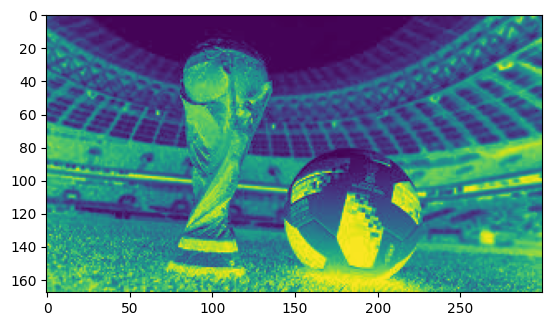

In [6]:
# 1.1 Biến đổi cường độ ảnh
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('world_cup.jpg').convert('L')

im_1 = np.asarray(img)
im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()



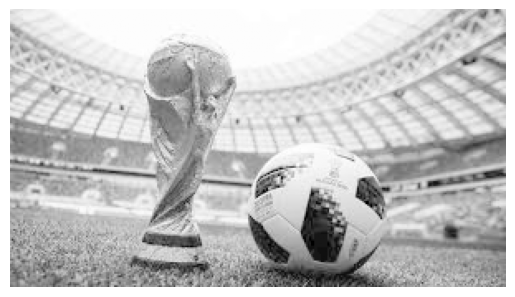

In [ ]:
#1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)
from PIL import Image
import numpy as np
import math
import scipy
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image into an ndarray
im1 = np.asarray(img)

# Init gamma
gamma = 0.5

# Convert ndarray from int to float
b1 = im1.astype(float)

# Find maximum value in b1
b2 = np.max(b1)

# Normalize
b3 = b1 / b2

# Gamma correction exponent is computed
b4 = np.log(b3 + 1e-8) * gamma  # +1e-8 to avoid log(0)

# Gamma correction is computed
c = np.exp(b4) * 255.0

# Convert to int
c1 = c.astype(np.uint8)

# Create image from array
d = Image.fromarray(c1)

# Show original and gamma corrected image
img.show()
d.show()

# Display with matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


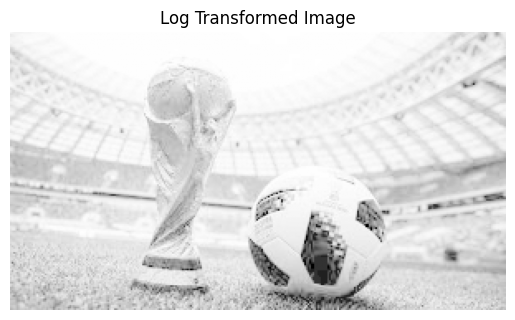

In [ ]:
# 1.3. Thay đổi cường độ điểm ảnh với Log Transformation
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image into ndarray
im_1 = np.asarray(img)

# Convert to float
bl = im_1.astype(float)

# Find maximum value
b2 = np.max(bl)

# Perform log transformation
c = (128.0 * np.log(1 + bl)) / np.log(1 + b2)

# Convert to uint8 for image display
cl = c.astype(np.uint8)

# Create image from array
d = Image.fromarray(cl)

# Show original and transformed image
img.show()
d.show()

# Display with matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.title('Log Transformed Image')
plt.show()


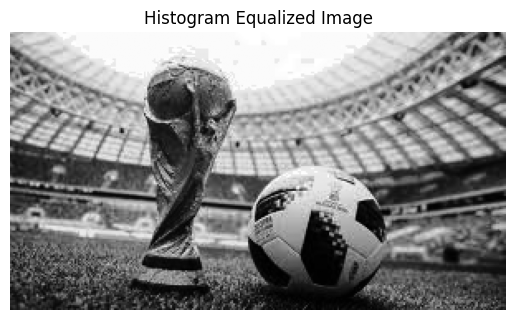

In [18]:
# 1.4. Histogram equalization
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image into ndarray
im1 = np.asarray(img)

# Flatten to 1D array
bl = im1.flatten()

# Compute histogram and bins
hist, bins = np.histogram(im1, 256, [0, 255])

# Compute cumulative distribution function (CDF)
cdf = hist.cumsum()

# Mask zeros in CDF
cdf_m = np.ma.masked_equal(cdf, 0)

# Histogram equalization formula
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

# Fill masked values with 0 and convert to uint8
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

# Apply equalization
im2 = cdf_final[bl]

# Reshape back to original 2D shape
im3 = np.reshape(im2, im1.shape)

# Convert to Image
im4 = Image.fromarray(im3)

# Show original and equalized image
img.show()
im4.show()

# Display with matplotlib
plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.title('Histogram Equalized Image')
plt.show()



Min: 0 Max: 255


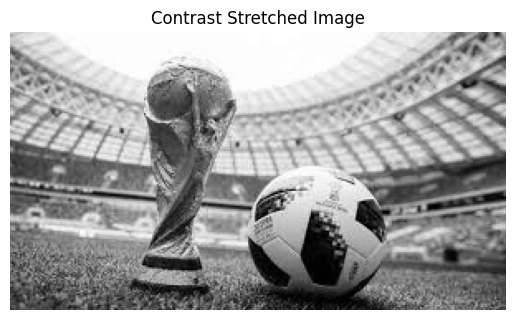

In [2]:
# 1.5. Thay đổi ảnh với Contrast Stretching
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Open grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert image to ndarray
im1 = np.asarray(img)

# Find min and max pixel values
a = im1.min()
b = im1.max()
print("Min:", a, "Max:", b)

# Convert to float
C = im1.astype(float)

# Contrast stretching
im2 = 255 * (C - a) / (b - a)

# Convert to uint8
im2 = im2.astype(np.uint8)

# Convert array back to image
im3 = Image.fromarray(im2)

# Show original and stretched images
img.show()
im3.show()

# Show using matplotlib
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.title('Contrast Stretched Image')
plt.show()



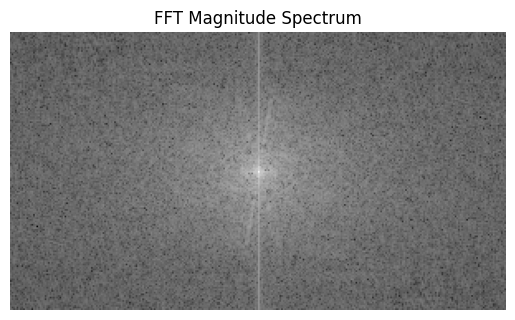

In [5]:
#1.6.1. Biến đổi ảnh với Fast Fourier
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pylab as plt

# Open grayscale image
img = Image.open('world_cup.jpg').convert('L')

# Convert to ndarray
im1 = np.asarray(img)

# Perform FFT
c = abs(scipy.fftpack.fft2(im1))

# Shift the zero frequency component to the center
d = scipy.fftpack.fftshift(c)

# Normalize d for display (scale to 0–255)
d = np.log(1 + d)  # Use log to compress dynamic range
d = 255 * (d - d.min()) / (d.max() - d.min())
d = d.astype(np.uint8)

# Convert array to image
im2 = Image.fromarray(d)

# Show original and FFT image
img.show()
im2.show()

# Display with matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.title('FFT Magnitude Spectrum')
plt.show()


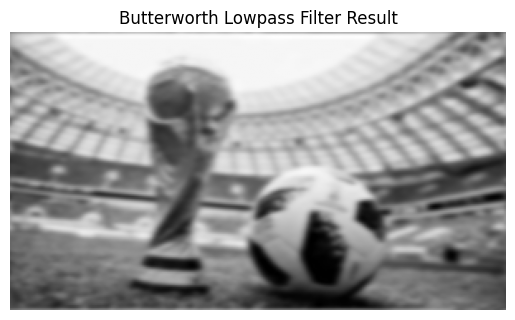

In [7]:
#1.6.2. Lọc ảnh trong miền tần suất
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math

# Open grayscale image
img = Image.open('world_cup.jpg').convert('L')
im1 = np.asarray(img)

# Perform FFT and shift
F = scipy.fftpack.fft2(im1)
F_shifted = scipy.fftpack.fftshift(F)

# Get image shape
M, N = im1.shape
center1 = M // 2
center2 = N // 2

# Butterworth Lowpass Filter (BLPF) parameters
d_0 = 30.0  # cutoff frequency
n = 2       # order

# Create Butterworth filter mask H
H = np.zeros((M, N))
for u in range(M):
    for v in range(N):
        D = math.sqrt((u - center1) ** 2 + (v - center2) ** 2)
        H[u, v] = 1 / (1 + (D / d_0) ** (2 * n))

# Apply filter in frequency domain
G_shifted = F_shifted * H

# Shift back and inverse FFT
G = scipy.fftpack.ifftshift(G_shifted)
img_filtered = scipy.fftpack.ifft2(G)
img_filtered = np.abs(img_filtered)

# Normalize for display
img_filtered = 255 * (img_filtered - np.min(img_filtered)) / (np.max(img_filtered) - np.min(img_filtered))
img_filtered = img_filtered.astype(np.uint8)

# Convert to image
im_out = Image.fromarray(img_filtered)

# Show results
img.show()
im_out.show()

plt.imshow(im_out, cmap='gray')
plt.axis('off')
plt.title('Butterworth Lowpass Filter Result')
plt.show()


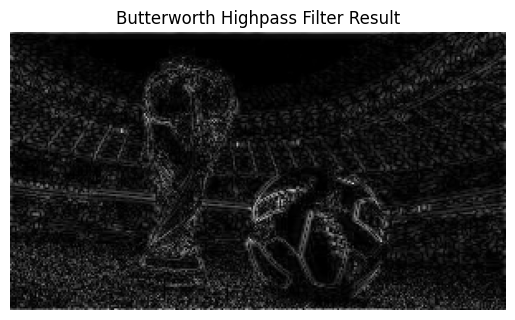

In [12]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import math

# Open grayscale image
img = Image.open('world_cup.jpg').convert('L')
im_array = np.asarray(img)

# FFT and shift
F = scipy.fftpack.fft2(im_array)
F_shifted = scipy.fftpack.fftshift(F)

# Dimensions
M, N = im_array.shape
center_M, center_N = M / 2, N / 2

# Butterworth Highpass Filter parameters
d_0 = 30.0  # cutoff frequency
n = 2       # filter order

# Create Butterworth Highpass Filter mask
H = np.zeros((M, N))
for u in range(M):
    for v in range(N):
        D = math.sqrt((u - center_M)**2 + (v - center_N)**2)
        if D == 0:
            H[u, v] = 0
        else:
            H[u, v] = 1 / (1 + (d_0 / D)**(2 * n))

# Apply filter in frequency domain
G_shifted = F_shifted * H

# Inverse FFT to spatial domain
G = scipy.fftpack.ifftshift(G_shifted)
img_filtered = np.abs(scipy.fftpack.ifft2(G))

# Normalize for display
img_filtered = 255 * (img_filtered - img_filtered.min()) / (img_filtered.max() - img_filtered.min())
img_filtered = img_filtered.astype(np.uint8)

# Convert to image and display
img_result = Image.fromarray(img_filtered)

# Show images
img.show()
img_result.show()

plt.imshow(img_result, cmap='gray')
plt.axis('off')
plt.title('Butterworth Highpass Filter Result')
plt.show()




=== MENU ===
I: Image Inverse
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching


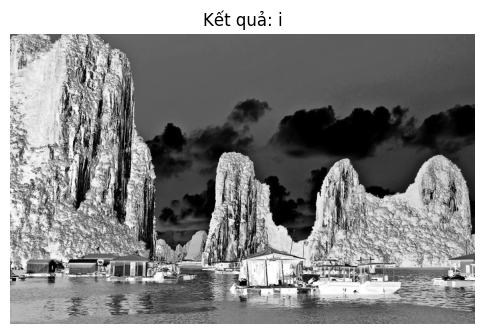

Đã lưu ảnh: output/ha-long-bay-in-vietnam_i.png


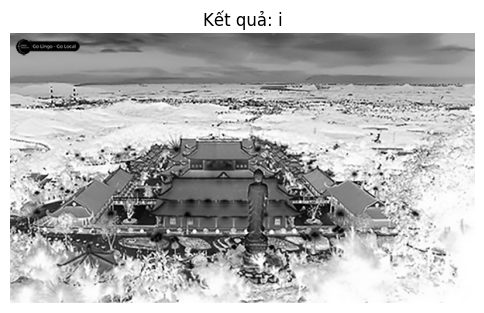

Đã lưu ảnh: output/pagoda_i.png


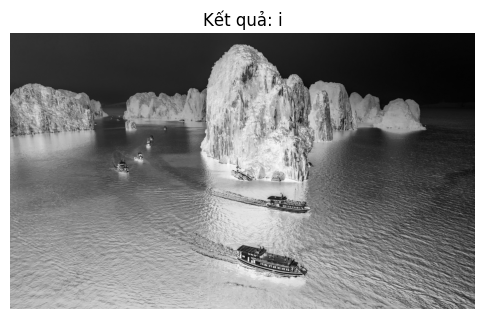

Đã lưu ảnh: output/quang_ninh_i.png


In [22]:
#Bài 1
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Đảm bảo thư mục output tồn tại
os.makedirs('output', exist_ok=True)

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    norm_img = img / 255.0
    corrected = np.power(norm_img, gamma)
    return (corrected * 255).astype(np.uint8)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img.astype(float))
    return np.array(log_img, dtype=np.uint8)

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cdf_final[img]

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return stretched.astype(np.uint8)

def apply_transformation(choice, img_array):
    if choice == 'I':
        return image_inverse(img_array)
    elif choice == 'G':
        return gamma_correction(img_array)
    elif choice == 'L':
        return log_transformation(img_array)
    elif choice == 'H':
        return histogram_equalization(img_array)
    elif choice == 'C':
        return contrast_stretching(img_array)
    else:
        return None

def show_and_save(result, original_path, suffix):
    result_img = Image.fromarray(result)

    # Hiển thị ảnh trực tiếp trong notebook hoặc cửa sổ terminal hỗ trợ matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(result_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    # Lưu ảnh
    base_name = os.path.basename(original_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    result_img.save(save_path)
    print(f"Đã lưu ảnh: {save_path}")

# Menu chính
def main():
    folder = "exercise"
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    
    print("=== MENU ===")
    print("I: Image Inverse")
    print("G: Gamma Correction")
    print("L: Log Transformation")
    print("H: Histogram Equalization")
    print("C: Contrast Stretching")
    
    choice = input("Chọn một phím (I/G/L/H/C): ").strip().upper()
    
    if choice not in ['I', 'G', 'L', 'H', 'C']:
        print("Lựa chọn không hợp lệ.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('L')
        img_array = np.asarray(img)
        result = apply_transformation(choice, img_array)
        if result is not None:
            show_and_save(result, img_path, choice.lower())

if __name__ == "__main__":
    main()


=== MENU BIẾN ĐỔI ẢNH MIỀN TẦN SỐ ===
F: Fast Fourier Transform
L: Butterworth Lowpass Filter
H: Butterworth Highpass Filter


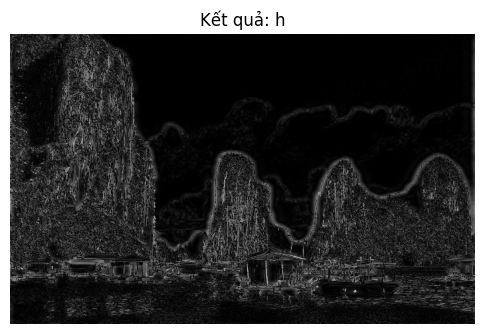

Đã lưu ảnh: output/ha-long-bay-in-vietnam_h.png


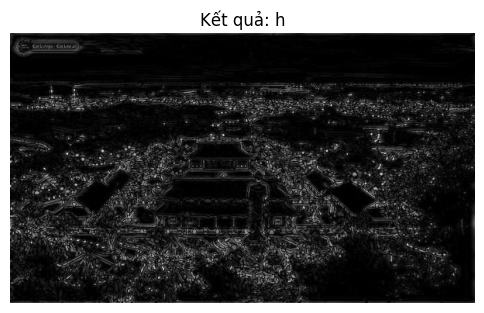

Đã lưu ảnh: output/pagoda_h.png


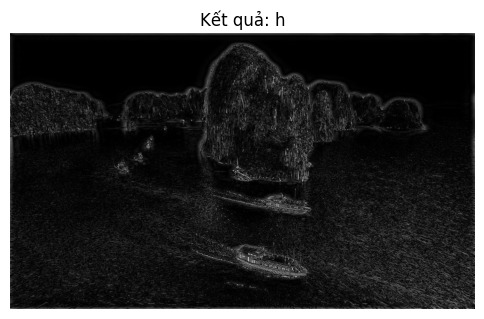

Đã lưu ảnh: output/quang_ninh_h.png


In [21]:
#bài 2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import math

# Tạo thư mục lưu ảnh kết quả
os.makedirs("output", exist_ok=True)

# Fast Fourier Transform (Magnitude Spectrum)
def fast_fourier(img_array):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)
    magnitude = 20 * np.log(np.abs(F_shifted) + 1)
    normalized = 255 * (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    return normalized.astype(np.uint8)

# Butterworth Lowpass Filter
def butterworth_lowpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)

    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D_uv = np.sqrt((u - M / 2)**2 + (v - N / 2)**2)
    
    H = 1 / (1 + (D_uv / d0)**(2 * n))
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# Butterworth Highpass Filter
def butterworth_highpass(img_array, d0=30.0, n=2):
    F = scipy.fftpack.fft2(img_array)
    F_shifted = scipy.fftpack.fftshift(F)

    M, N = img_array.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N).reshape(1, -1)
    D_uv = np.sqrt((u - M / 2)**2 + (v - N / 2)**2)
    
    H = 1 / (1 + (d0 / (D_uv + 1e-5))**(2 * n))  # avoid divide by zero
    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    
    return np.uint8(255 * (img_back - img_back.min()) / (img_back.max() - img_back.min()))

# Áp dụng xử lý theo lựa chọn
def apply_transformation(choice, img_array):
    if choice == 'F':
        return fast_fourier(img_array)
    elif choice == 'L':
        return butterworth_lowpass(img_array)
    elif choice == 'H':
        return butterworth_highpass(img_array)
    else:
        return None

# Hiển thị và lưu ảnh
def show_and_save(result, original_path, suffix):
    img_result = Image.fromarray(result)

    # Hiển thị ngay trong Jupyter/Python
    plt.figure(figsize=(6,6))
    plt.imshow(img_result, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    # Lưu ảnh
    base_name = os.path.basename(original_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    img_result.save(save_path)
    print(f"Đã lưu ảnh: {save_path}")

# Menu chính
def main():
    folder = "exercise"
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    
    print("=== MENU BIẾN ĐỔI ẢNH MIỀN TẦN SỐ ===")
    print("F: Fast Fourier Transform")
    print("L: Butterworth Lowpass Filter")
    print("H: Butterworth Highpass Filter")
    
    choice = input("Chọn một phím (F/L/H): ").strip().upper()
    
    if choice not in ['F', 'L', 'H']:
        print("Lựa chọn không hợp lệ.")
        return

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('L')
        img_array = np.asarray(img)
        result = apply_transformation(choice, img_array)
        if result is not None:
            show_and_save(result, img_path, choice.lower())

if __name__ == "__main__":
    main()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19484\2256043064.py:21: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19484\2256043064.py:21: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))


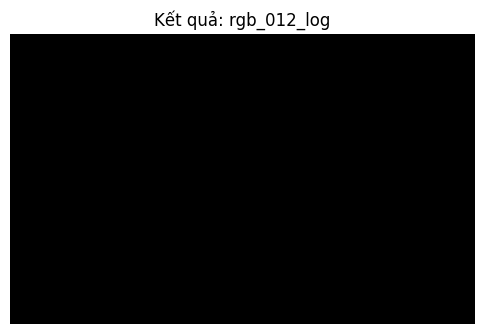

Đã lưu ảnh: output/ha-long-bay-in-vietnam_rgb_012_log.png


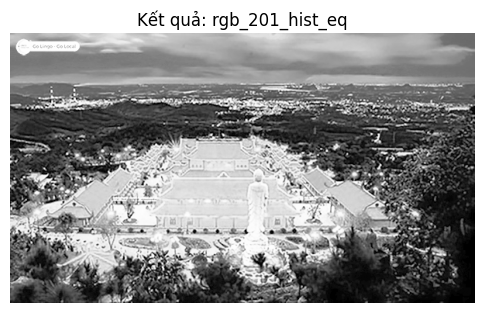

Đã lưu ảnh: output/pagoda_rgb_201_hist_eq.png


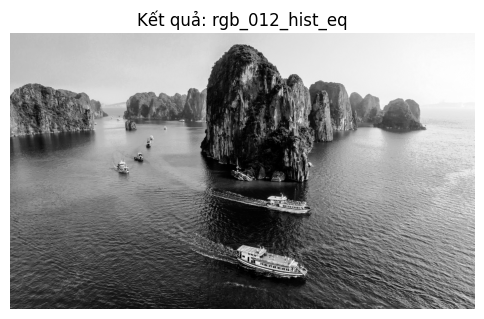

Đã lưu ảnh: output/quang_ninh_rgb_012_hist_eq.png


In [23]:
#Bài 3
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Đảm bảo thư mục output tồn tại
os.makedirs('output', exist_ok=True)

# --- Các hàm biến đổi ảnh từ Bài 1 ---
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    norm_img = img / 255.0
    corrected = np.power(norm_img, gamma)
    return (corrected * 255).astype(np.uint8)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img.astype(float))
    return np.array(log_img, dtype=np.uint8)

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cdf_final[img]

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return stretched.astype(np.uint8)

# Danh sách các hàm biến đổi và tên tương ứng
transformations = [
    ('inverse', image_inverse),
    ('gamma', gamma_correction),
    ('log', log_transformation),
    ('hist_eq', histogram_equalization),
    ('contrast', contrast_stretching)
]

# Hiển thị và lưu ảnh
def show_and_save(result, original_path, suffix):
    result_img = Image.fromarray(result)
    plt.figure(figsize=(6, 6))
    plt.imshow(result_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    result_img.save(save_path)
    print(f"Đã lưu ảnh: {save_path}")

# Xử lý tất cả ảnh trong thư mục
def main():
    folder = "exercise"
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img_color = Image.open(img_path).convert('RGB')
        img_array = np.array(img_color)

        # Đổi thứ tự màu RGB ngẫu nhiên
        channels = [0, 1, 2]
        random.shuffle(channels)
        img_shuffled = img_array[:, :, channels]

        # Chuyển sang grayscale để áp dụng biến đổi
        img_gray = Image.fromarray(img_shuffled).convert('L')
        img_gray_np = np.array(img_gray)

        # Chọn ngẫu nhiên 1 phép biến đổi
        trans_name, trans_func = random.choice(transformations)
        result = trans_func(img_gray_np)

        # Hiển thị và lưu ảnh
        suffix = f"rgb_{''.join(str(c) for c in channels)}_{trans_name}"
        show_and_save(result, img_path, suffix)

if __name__ == "__main__":
    main()


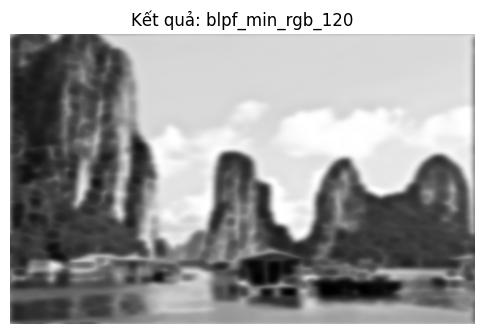

Đã lưu ảnh: output/ha-long-bay-in-vietnam_blpf_min_rgb_120.png


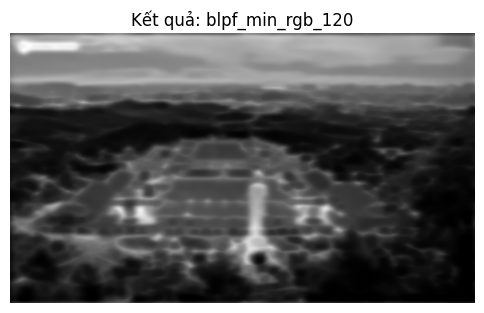

Đã lưu ảnh: output/pagoda_blpf_min_rgb_120.png


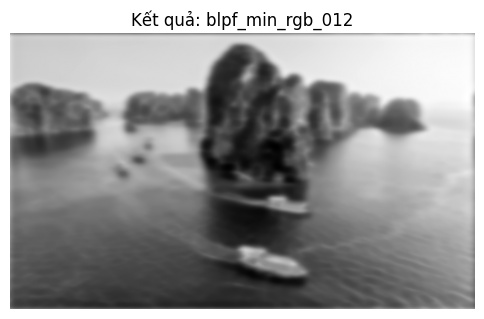

Đã lưu ảnh: output/quang_ninh_blpf_min_rgb_012.png


In [24]:
# Bài 4
import os
import random
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import scipy.fftpack

# Đảm bảo thư mục output tồn tại
os.makedirs('output', exist_ok=True)

def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.clip(magnitude_spectrum, 0, 255).astype(np.uint8)

def butterworth_lowpass(img, d0=30, n=2):
    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N/2)**2 + (V - M/2)**2)
    H = 1 / (1 + (D / d0)**(2*n))

    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.clip(g, 0, 255).astype(np.uint8)

def butterworth_highpass(img, d0=30, n=2):
    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N/2)**2 + (V - M/2)**2)
    H = 1 - 1 / (1 + (D / d0)**(2*n))

    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    G = H * F_shift
    g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.clip(g, 0, 255).astype(np.uint8)

def apply_min_filter(img):
    pil_img = Image.fromarray(img)
    return np.array(pil_img.filter(ImageFilter.MinFilter(size=3)))

def apply_max_filter(img):
    pil_img = Image.fromarray(img)
    return np.array(pil_img.filter(ImageFilter.MaxFilter(size=3)))

def show_and_save(result, original_path, suffix):
    result_img = Image.fromarray(result)
    plt.figure(figsize=(6, 6))
    plt.imshow(result_img, cmap='gray')
    plt.axis('off')
    plt.title(f"Kết quả: {suffix}")
    plt.show()

    base_name = os.path.basename(original_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"output/{name}_{suffix}.png"
    result_img.save(save_path)
    print(f"Đã lưu ảnh: {save_path}")

def main():
    folder = "exercise"
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img_color = Image.open(img_path).convert('RGB')
        img_array = np.array(img_color)

        # Xáo trộn RGB
        channels = [0, 1, 2]
        random.shuffle(channels)
        shuffled_img = img_array[:, :, channels]

        # Chuyển thành ảnh xám
        gray_img = Image.fromarray(shuffled_img).convert('L')
        gray_np = np.array(gray_img)

        # Chọn phép biến đổi ngẫu nhiên
        transform_choice = random.choice(['F', 'L', 'H'])

        if transform_choice == 'F':
            result = fast_fourier(gray_np)
            suffix = f"fft_rgb_{''.join(map(str, channels))}"
        elif transform_choice == 'L':
            result = butterworth_lowpass(gray_np)
            result = apply_min_filter(result)
            suffix = f"blpf_min_rgb_{''.join(map(str, channels))}"
        elif transform_choice == 'H':
            result = butterworth_highpass(gray_np)
            result = apply_max_filter(result)
            suffix = f"bhpf_max_rgb_{''.join(map(str, channels))}"
        else:
            continue

        show_and_save(result, img_path, suffix)

if __name__ == "__main__":
    main()
